<a href="https://colab.research.google.com/github/agusrdlv/diplodatos_iaa/blob/master/Lab_1_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [5]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El dataset original pertenece a un paper de Harrison, D. y Rubinfeld, D.L. sobre precios hedónicos aplicado a real estate del área metropolitana de Bostón. El análisis de precios hedónicos pretende descomponer el precio de un bien según las carácterísticas del mismo, por lo que se suelen correr regresiones de los precios contra factores que podrían afectarlo como lugar, servicios, tipo de barrio, acceso, instituciones cercanas etc. En este dataset en particular se intentó determinar si la contaminación del aire era un factor determinante, llegando a la conclusión de que los modelos eran sensibles a las especificaciones de la ecuación hedónica cuando se asumia la independencia de variables [1].
2. La variable objetivo es 'MEDV', la mediana del valor de las casas ocupadas por sus dueños, medida en miles de dólares.
3. Hay trece atributos disponibles para hacer la predicción:
        - CRIM     tasa de crimen per capita por población,
        - ZN       proporción de área recidencial para lotes mayores a 25,000 pies2 (2322.576 m2)
        - INDUS    proporción de acres de negocios no-minoristas por población no proportion of non-retail business acres per town
        - CHAS     Dummy sobre si el terreno tiene costa en el rio Charles 
        - NOX      Concentración de óxido nítrico (partes por 10 millones)
        - RM       Promedio de habitaciones por viviendo
        - AGE      Proporción de viviendas ocuapdas por sus dueños construidas antes de 1940
        - DIS      Distancias ponderadas hacia los 5 centros de empleo de Boston
        - RAD      Indice de accesibilidad hacia las autopistas radiales
        - TAX      Valor del impuesto a la propiedad cada $10,000
        - PTRATIO  Relacion pupilo/maestro de la poblacion 
        - B        1000(Bk - 0.63)^2 donde Bk es la proporcion de gente negra por poblacion
        - LSTAT    porcentaje de poblacion de menor estatus
        
4. Creemos que las variables más relevantes pueden ser:
        - CRIM
        - RM
        - AGE
        - DIS
        - PTRATIO. 
5. Algunos de las variables claramente tienen un sesgo social: B y LSTAT. El estatus social promedio de los barrios si bien tiene una implicancia ética, sigue siendo utilizado habitualmente para determinar los valores de los inmuebles ya que es común que las personas formen comglomerados por similares estados, pero estas características también pueden aproximarse por el promedio del tamaño de las construcciones y su calidad. Si bien el factor racial puede haber sido un factor determinante en los 80', sería lastimoso que siga siendo significativo 40 años después y probablemente pierda relevancia. Finalmente, a partir de [2] se mencionan los siguientes problemas de origen en el conjunto de datos: 

    * *Datos censurados:* En este caso, decidieron establecer el valor máximo de la variable MEDV en 50k USD, por lo que ningún precio puede ir más allá de ese valor.
    * *Datos incorrectos:* Se descubrió que ocho de los precios medios en la columna de valor medio eran erróneos. Aparentemente corregidos pasado el tiempo.

#### Referencias
[1] https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air/

[2] https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

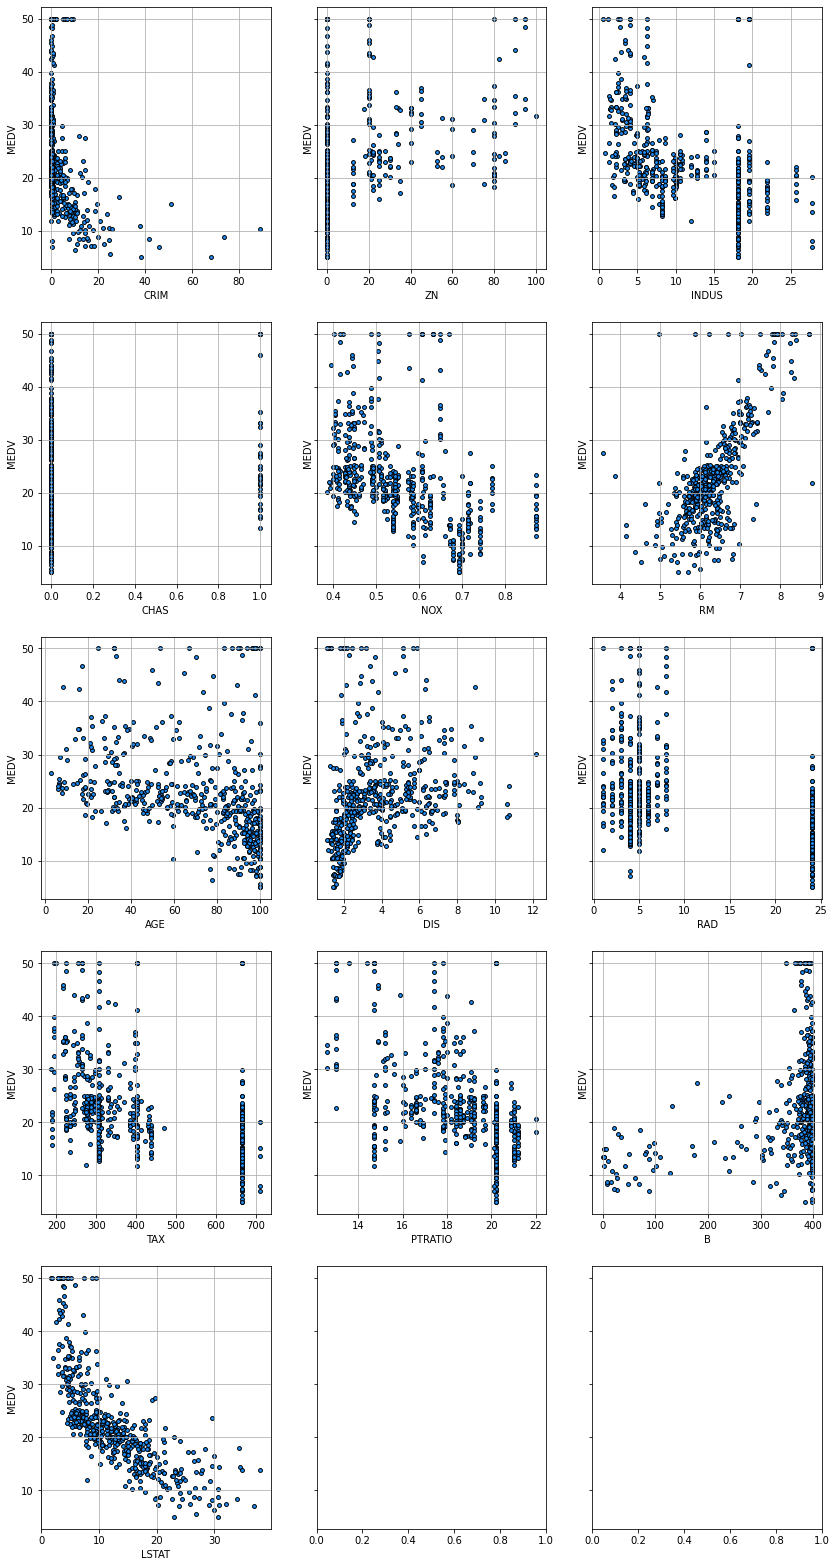

In [7]:
# 1. Resolver acá. Ayuda/ejemplo:
ncols = 3
nrows = np.ceil(boston['feature_names'].shape[0]/ncols).astype(int) # Numero de filas para plotear
fsize = 14 # Tamaño de la subfigura

# Matriz de subfiguras con reshape para poder indexarla
fig, axs = plt.subplots(nrows, ncols, sharey=True, figsize=(fsize,2*fsize))
axs = axs.reshape(1,ncols*nrows)[0]

for idx, feature in enumerate(boston['feature_names']):
    selector = (boston['feature_names'] == feature)
    axs[idx].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos", s=15)
    axs[idx].set_xlabel(feature)
    axs[idx].set_ylabel('MEDV')
    # axs[idx].set_title(feature)
    axs[idx].grid(True)

**2. Responder acá**

A criterio del observador, las relaciones que parecen más claras son 

 - LSTAT
 - RM
 - PTRATIO
 - TAX
 - NOX

**3. Responder acá**

1. LSTAT
2. RM
3. DIS
4. CRIM
5. AGE
6. NOX

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [8]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [9]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [10]:
# 3. Predecir y evaluar acá.
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [11]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 3.7e+01
Error en prueba: 4.6e+01


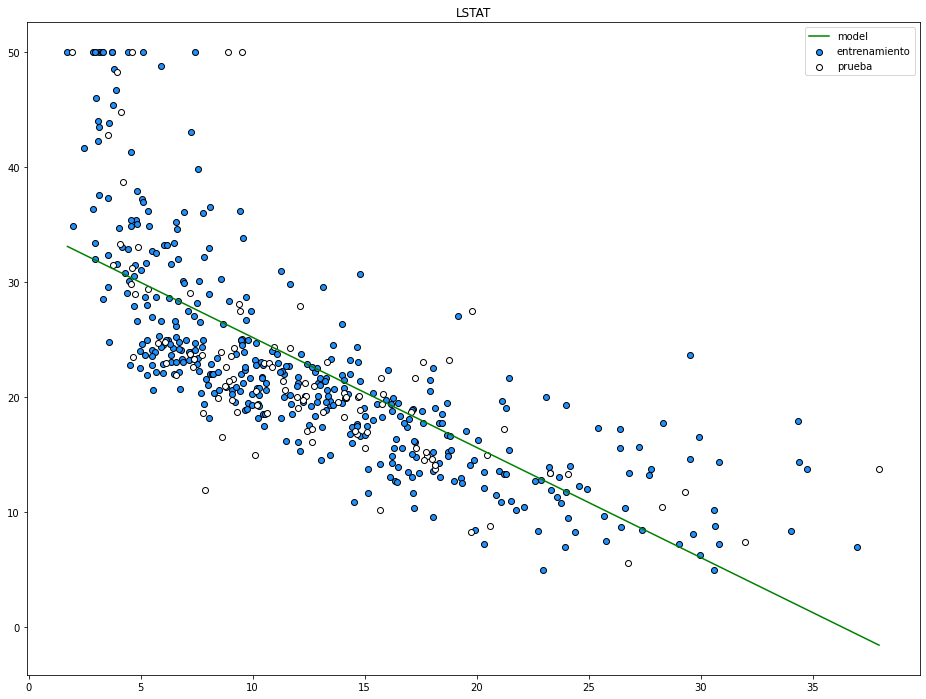

In [12]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(16,12))
plt.plot(x, model.predict(x), color="green", label="model")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="prueba")
plt.title(feature)
plt.legend()
plt.show()

**5. Responder acá**

Como se podía visualizar, la relación entre la variable LSTAT y el target (MEDV) es inversamente proporcional, lo cual se ve reflejado en la pendiente del ajuste lineal. Sin embargo, puede verse como los puntos en los "extremos" de los valores de LSTAT (cercanos a 0 y 40) se escapan al alcance de la recta. Se observa que el error de train vs. test difiere aproximadamente en un 20%

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [13]:
# 1. Resolver acá.
train_errors = []
test_errors = []
sum_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    sum_errors.append(train_error + test_error)

    print(f'Con grado {degree} en entrenamiento error: {train_error:0.2}, prueba: {test_error:0.2}, suma: {test_error+train_error:0.2}')

Con grado 0 en entrenamiento error: 8.5e+01, prueba: 8.2e+01, suma: 1.7e+02
Con grado 1 en entrenamiento error: 3.7e+01, prueba: 4.6e+01, suma: 8.3e+01
Con grado 2 en entrenamiento error: 2.8e+01, prueba: 3.9e+01, suma: 6.7e+01
Con grado 3 en entrenamiento error: 2.7e+01, prueba: 3.7e+01, suma: 6.4e+01
Con grado 4 en entrenamiento error: 2.6e+01, prueba: 3.5e+01, suma: 6.1e+01
Con grado 5 en entrenamiento error: 2.5e+01, prueba: 3.5e+01, suma: 6e+01
Con grado 6 en entrenamiento error: 2.5e+01, prueba: 3.4e+01, suma: 5.9e+01
Con grado 7 en entrenamiento error: 2.5e+01, prueba: 3.4e+01, suma: 5.9e+01
Con grado 8 en entrenamiento error: 2.5e+01, prueba: 3.6e+01, suma: 6.1e+01
Con grado 9 en entrenamiento error: 2.5e+01, prueba: 3.5e+01, suma: 6e+01
Con grado 10 en entrenamiento error: 2.5e+01, prueba: 4.2e+01, suma: 6.6e+01
Con grado 11 en entrenamiento error: 2.6e+01, prueba: 3.9e+01, suma: 6.6e+01
Con grado 12 en entrenamiento error: 2.8e+01, prueba: 7.7e+01, suma: 1.1e+02
Con grado 13 

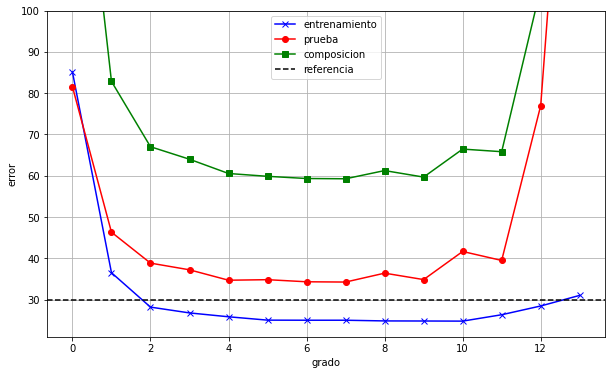

In [14]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, '-x', color="blue", label="entrenamiento")
plt.plot(degrees, test_errors, '-o', color="red", label="prueba")
plt.plot(degrees, sum_errors, '-s', color="g", label="composicion")
plt.axhline(30, ls = '--', color = 'black', label="referencia")
plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.ylim([21,100])
plt.grid(True)
plt.show()

**3. Responder acá**

Para grado 6 y 7 se puede apreciar el menor valor para el error en el conjunto de prueba. Se observa sobreajuste a partir de grado = 11 del polinomio. Por principio de parsimonia y ante iguales resultados, es preferible tomar la solución de menor grado.


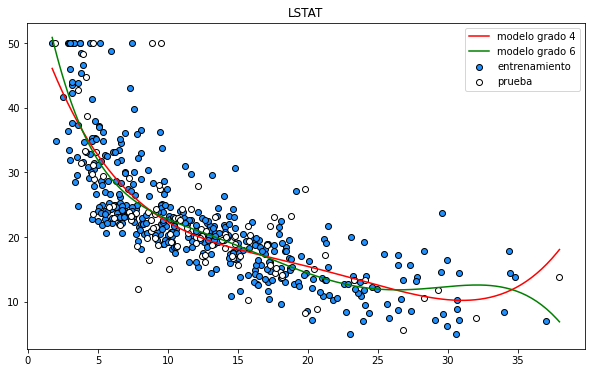

In [15]:
# 4. Reconstruir mejor modelo acá y graficar.
# train:
degree4 = 4
model4 = make_pipeline(PolynomialFeatures(degree4), LinearRegression())
model4.fit(X_train_f, y_train)

degree = 6
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

# predict:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

#graph
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.plot(x, model4.predict(x), color="red", label="modelo grado 4")
plt.plot(x, model.predict(x), color="green", label="modelo grado 6")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="prueba")
plt.title(feature)
plt.legend()
plt.show()

*5. Responder acá*

El modelo obtenido con un polinomio de grado seis minimiza el error en test del modelo. De esta manera parece ser la mejor aproximación al fenómeno subyacente. El incremento de grado, respecto al caso lineal, permite ajustar mejor los datos en los extremos, específicamente en los rangos 0 a 5 y mayores a 25; y también describe la relación inversamente proporcional, que se había mencionado también para el ajuste lineal.

A modo comparativo y por mera curiosidad se deja presente en la gráfica resultados de utilizar un polinomio de grado 4 para ajustar los puntos.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [16]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [17]:
# 2. Resolver acá.
train_errors = []
test_errors = []
sum_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    sum_errors.append(train_error + test_error)

    print(f'Con grado {degree} error en entrenamiento: {train_error:0.2}, prueba: {test_error:0.2}, suma: {train_error+test_error:0.2}')

Con grado 1 error en entrenamiento: 2.9e+01, prueba: 3.7e+01, suma: 6.6e+01
Con grado 2 error en entrenamiento: 1.9e+01, prueba: 2.8e+01, suma: 4.7e+01
Con grado 3 error en entrenamiento: 1.7e+01, prueba: 2.9e+01, suma: 4.6e+01
Con grado 4 error en entrenamiento: 1.4e+01, prueba: 3.4e+01, suma: 4.8e+01
Con grado 5 error en entrenamiento: 1.3e+01, prueba: 3.4e+01, suma: 4.7e+01
Con grado 6 error en entrenamiento: 1.2e+01, prueba: 3.5e+01, suma: 4.7e+01
Con grado 7 error en entrenamiento: 1.2e+01, prueba: 1.6e+02, suma: 1.7e+02
Con grado 8 error en entrenamiento: 1.2e+01, prueba: 7.4e+02, suma: 7.5e+02
Con grado 9 error en entrenamiento: 1.4e+01, prueba: 7e+02, suma: 7.2e+02


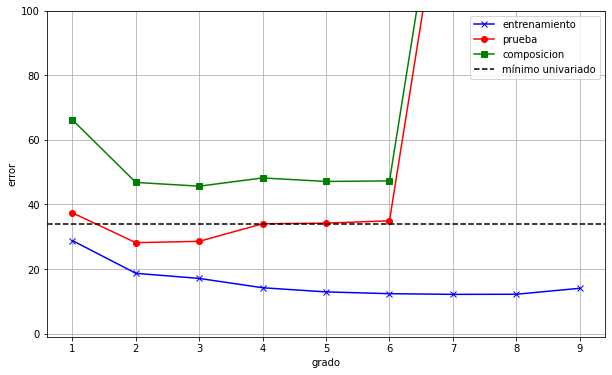

In [18]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, '-x', color="blue", label="entrenamiento")
plt.plot(degrees, test_errors, '-o', color="red", label="prueba")
plt.plot(degrees, sum_errors, '-s', color="g", label="composicion")
plt.axhline(34, ls = '--', color = 'black', label="mínimo univariado")
plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.ylim([-1,100])
plt.grid(True)
plt.show()

**3. Responder acá.**

Para el modelo con un polinomio de grado dos, se ve una mejora respecto a la referencia del modelo univariado del caso anterior.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.


Grado: 1 error en entrenamiento: 1.9e+01, prueba: 3.3e+01
Grado: 2 error en entrenamiento: 6.3, prueba: 2.5e+01
Grado: 3 error en entrenamiento: 2.3e-11, prueba: 1.1e+06
Grado: 4 error en entrenamiento: 2.2e-19, prueba: 9.8e+05
Grado: 5 error en entrenamiento: 7.2e-20, prueba: 2e+05
Grado: 6 error en entrenamiento: 1.5e-20, prueba: 2e+05
Grado: 7 error en entrenamiento: 1.1e-18, prueba: 2.5e+04
Grado: 8 error en entrenamiento: 6e-20, prueba: 1.7e+05
Grado: 9 error en entrenamiento: 1.2e-19, prueba: 5.6e+05


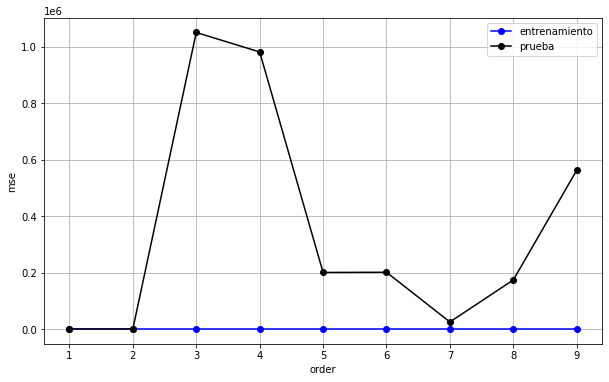

In [19]:
train_mse = list()
test_mse = list()
degrees = range(1,10)
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_mse.append(train_error)
    test_mse.append(test_error)
    
    print(f'Grado: {degree} error en entrenamiento: {train_error:0.2}, prueba: {test_error:0.2}')
    
plt.figure(figsize=(10,6))
plt.plot(degrees, train_mse, 'b-o', label='entrenamiento')
plt.plot(degrees, test_mse, 'k-o', label='prueba')
plt.legend()
plt.xlabel('order')
plt.ylabel('mse')
plt.grid(True)

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [20]:
from sklearn.linear_model import Ridge

In [21]:
alphas = np.linspace(1e-4,1,100) 
#alphas = np.linspace(1e-5,1,100) Esto me parece mejor 

feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

train_errors = list()
test_errors = list()

for alpha in alphas:
    # train:
    degree = 2
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(X_train_f, y_train)

    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f'Train error with alpha {alpha} error: {train_error:0.2}')
    print(f'Test error with alpha {alpha} error: {test_error:0.2}')

Train error with alpha 0.0001 error: 3.8e+01
Test error with alpha 0.0001 error: 4e+01
Train error with alpha 0.010199999999999999 error: 3.8e+01
Test error with alpha 0.010199999999999999 error: 4e+01
Train error with alpha 0.0203 error: 3.8e+01
Test error with alpha 0.0203 error: 4e+01
Train error with alpha 0.0304 error: 3.8e+01
Test error with alpha 0.0304 error: 4e+01
Train error with alpha 0.0405 error: 3.8e+01
Test error with alpha 0.0405 error: 4e+01
Train error with alpha 0.0506 error: 3.8e+01
Test error with alpha 0.0506 error: 4e+01
Train error with alpha 0.060700000000000004 error: 3.8e+01
Test error with alpha 0.060700000000000004 error: 4e+01
Train error with alpha 0.0708 error: 3.8e+01
Test error with alpha 0.0708 error: 4e+01
Train error with alpha 0.0809 error: 3.8e+01
Test error with alpha 0.0809 error: 4e+01
Train error with alpha 0.091 error: 3.8e+01
Test error with alpha 0.091 error: 4e+01
Train error with alpha 0.1011 error: 3.8e+01
Test error with alpha 0.1011 er

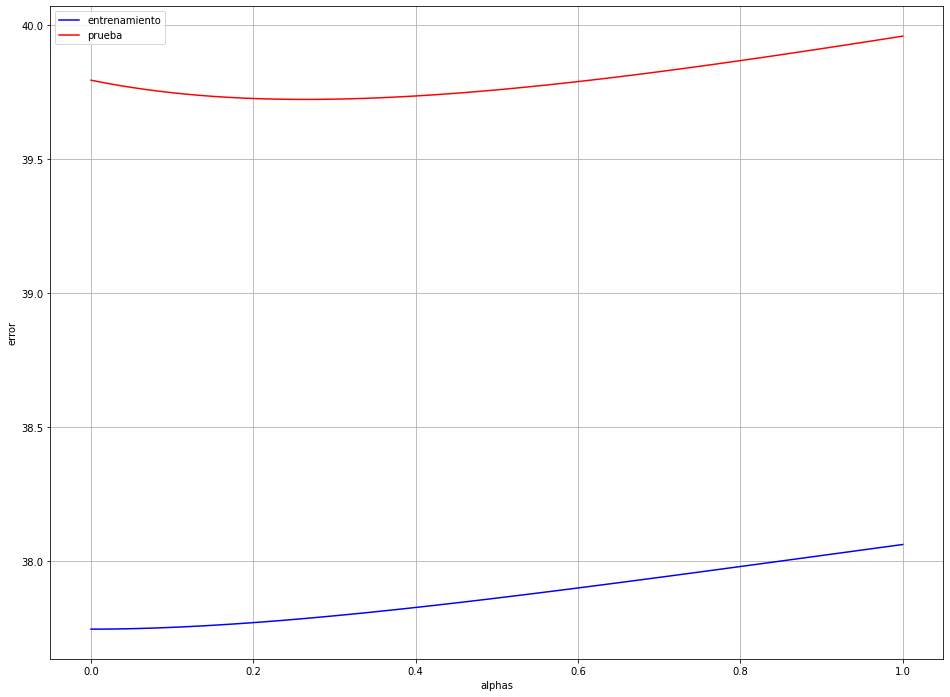

In [22]:
plt.figure(figsize=(16,12))
plt.plot(alphas, train_errors, color="blue", label="entrenamiento")
plt.plot(alphas, test_errors, color="red", label="prueba")
plt.legend()
plt.xlabel("alphas")
plt.ylabel("error")
plt.grid(True)
plt.show()

### Ejemplo de juguete para manejar sobreajuste y regularizacion

(24, 1) (6, 1) (24, 1) (6, 1)


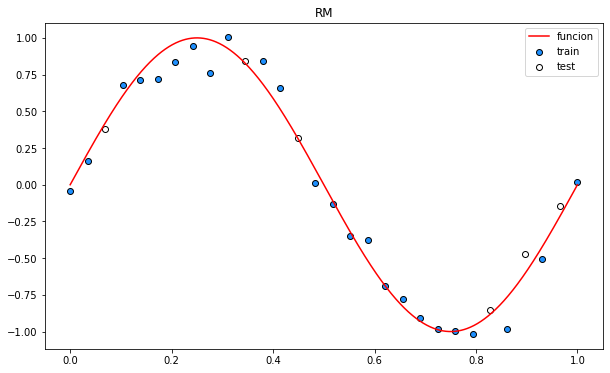

In [23]:
# 1. Resolver acá. Ayuda (con dos atributos):

Xp = np.linspace(0,1,1000)
Yp = np.sin(2*np.pi*Xp)

N = 30
X = np.linspace(0,1,N)
X = np.array([[i] for i in X])
Y = np.sin(2*np.pi*X)

y = Y + np.array([[i] for i in np.random.normal(0, 0.1, N)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.figure(figsize=(10,6))
plt.plot(Xp,Yp, 'r', label='funcion')
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(feature)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.p

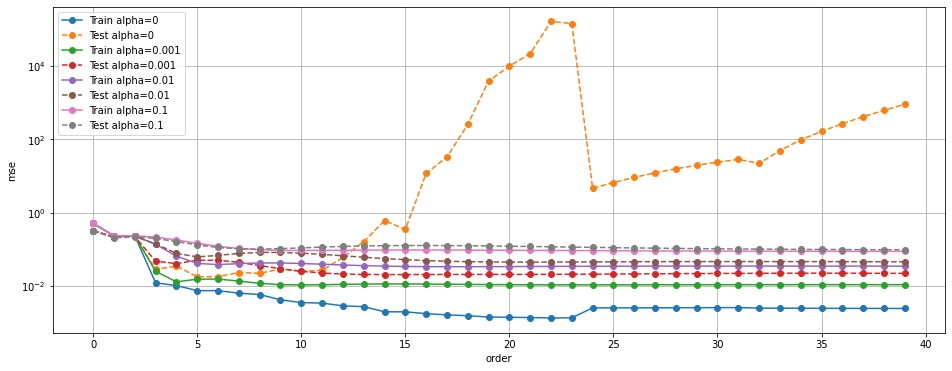

In [24]:
from sklearn.linear_model import Ridge


alphas = [0,0.001, 0.01, 0.1]
degrees = range(0,40)

plt.figure(figsize=(16,6))
for alpha in alphas:
    train_mse = list()
    test_mse = list()
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)
    
        train_mse.append(train_error)
        test_mse.append(test_error)
    
#         print(f'Alpha: {alpha} Degree: {degree} Train MSE: {train_error:0.2} Test MSE: {test_error:0.2}')
    

    plt.semilogy(degrees, train_mse, '-o', label=f'Train alpha={alpha}')
    plt.semilogy(degrees, test_mse, '--o', label=f'Test alpha={alpha}')

plt.legend()
plt.xlabel('order')
plt.ylabel('mse')
# plt.ylim([0,10])
plt.grid(True)